In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read csv file
data=pd.read_csv("spam.csv",encoding="latin_1")
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#find no.of rows and columns
data.shape

(5572, 5)

In [4]:
#find if any NaN numbers is there in data
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
#Drop columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
#column names rechange
data = data.rename(columns={"v1":"label", "v2":"text"})

In [8]:
#Count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':1, 'spam':0})

In [10]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [11]:
data['length'] = data['text'].apply(len)
data.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


In [13]:
x=np.array(data['text'])
x


array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [14]:
y = np.array(data['label_num'])
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

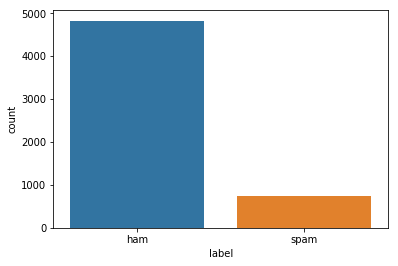

In [15]:
import seaborn as sns
sns.countplot(data["label"])
plt.show()

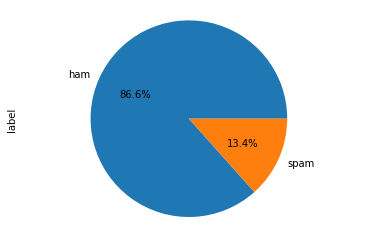

In [188]:
data["label"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()


In [189]:
spam1=data.loc[data['label']=='spam']
spam1["text"].head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: text, dtype: object

In [190]:
ham1=data.loc[data['label']=='ham']
ham1["text"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: text, dtype: object

In [191]:
x_train=np.array(data.iloc[0:500,1])
x_train.shape

(500,)

In [192]:
y_train=np.array(data.iloc[0:500,0])
y_train[0:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype=object)

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [195]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()


In [196]:
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

In [197]:
from sklearn.naive_bayes import MultinomialNB


In [198]:
model=MultinomialNB()
model.fit(train_data,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [199]:
test_data

<1672x7201 sparse matrix of type '<class 'numpy.int64'>'
	with 20513 stored elements in Compressed Sparse Row format>

In [200]:
pred=model.predict(test_data)
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [201]:
model.score(test_data,y_test)

0.9832535885167464

In [202]:
#creating testing data
x_test=[ "hi how are you","when will you go to home", "i will call you back", "are you busy now",
        "WINNER!! As a valued network customer you have..."]
                 
                

In [203]:
x_test.append("goodmoring")

In [204]:
x_test

['hi how are you',
 'when will you go to home',
 'i will call you back',
 'are you busy now',
 'WINNER!! As a valued network customer you have...',
 'goodmoring']

In [205]:
x_test1=np.array(x_test)
x_test1

array(['hi how are you', 'when will you go to home',
       'i will call you back', 'are you busy now',
       'WINNER!! As a valued network customer you have...', 'goodmoring'],
      dtype='<U49')

In [206]:
X_train=data.iloc[0:200,1]
X_train[0:6]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: text, dtype: object

In [207]:
Y_train=data.iloc[0:200,0]
Y_train[0:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [208]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [209]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(x_test1)

In [210]:
train_data.shape

(200, 1159)

In [211]:
test_data.shape

(6, 1159)

In [212]:
Y_train.shape

(200,)

In [213]:
from sklearn.naive_bayes import MultinomialNB


In [214]:
model=MultinomialNB()
model.fit(train_data,Y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [215]:
pred=model.predict(test_data)
pred

array(['ham', 'ham', 'ham', 'ham', 'spam', 'ham'], dtype='<U4')

In [216]:
df = pd.DataFrame(dict(x=x_test1, y=pred))
df

,x,y
0,hi how are you,ham
1,when will you go to home,ham
2,i will call you back,ham
3,are you busy now,ham
4,WINNER!! As a valued network customer you have...,spam
5,goodmoring,ham


In [217]:
df.iloc[3:]

,x,y
3,are you busy now,ham
4,WINNER!! As a valued network customer you have...,spam
5,goodmoring,ham


In [228]:
data.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


In [229]:
ham=data[data['label']=='ham'][:747]
spam=data[data['label']=='spam']
ham.shape,spam.shape

((747, 4), (747, 4))

In [230]:
newdata=pd.concat([ham,spam])
newdata=newdata.sample(frac=1,random_state=40)
newdata.head()

,label,text,label_num,length
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...,1,184
249,spam,Congratulations ur awarded 500 of CD vouchers ...,0,150
441,ham,You were supposed to wake ME up &gt;:(,1,38
85,ham,"I call you later, don't have network. If urgnt...",1,55
562,ham,Geeeee ... I love you so much I can barely sta...,1,51


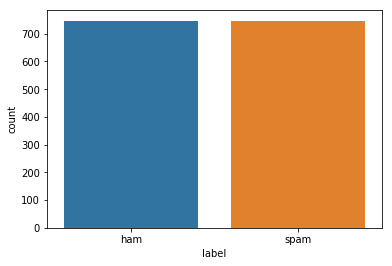

In [231]:
sns.countplot(x='label',data=newdata)

In [232]:
newdata['label'] = newdata.label.map({'ham':1, 'spam':0})

In [233]:
newdata.head()

,label,text,label_num,length
98,1,Hi. Wk been ok - on hols now! Yes on for a bit...,1,184
249,0,Congratulations ur awarded 500 of CD vouchers ...,0,150
441,1,You were supposed to wake ME up &gt;:(,1,38
85,1,"I call you later, don't have network. If urgnt...",1,55
562,1,Geeeee ... I love you so much I can barely sta...,1,51


In [234]:
X=np.array(newdata['text'])
X

array(['Hi. Wk been ok - on hols now! Yes on for a bit of a run. Forgot that i have hairdressers appointment at four so need to get home n shower beforehand. Does that cause prob for u?\\"\rham"',
       'Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16',
       'You were supposed to wake ME up &gt;:(', ...,
       "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
       'Where are you lover ? I need you ...',
       '3. You have received your mobile content. Enjoy'], dtype=object)

In [235]:
Y=np.array(newdata['label'])
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [237]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [238]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [239]:
train_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [240]:
from sklearn.naive_bayes import MultinomialNB

In [242]:
model=MultinomialNB()
model.fit(train_data,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [243]:
pred=model.predict(test_data)
pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtyp

In [244]:
model.score(test_data,Y_test)

0.9565217391304348

array(["Sorry battery died, yeah I'm here",
       'Nope... Think i will go for it on monday... Sorry i replied so late',
       'Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;',
       ...,
       'Thanks for your ringtone order, reference number X49. Your mobile will be charged 4.50. Should your tone not arrive please call customer services 09065989182. From: [colour=red]text[/colour]TXTstar',
       'Free 1st week entry 2 TEXTPOD 4 a chance 2 win 40GB iPod or å£250 cash every wk. Txt VPOD to 81303 Ts&Cs www.textpod.net custcare 08712405020.',
       'Dear,Me at cherthala.in case u r coming cochin pls call bfore u start.i shall also reach accordingly.or tell me which day u r coming.tmorow i am engaged ans its holiday.'],
      dtype=object)